# Project: Analyzing the naming trends using Python

Industry: General

**Problem Statement:**

The dataset is in Zipped format, we have to extract the dataset in the program, visualize the number of
male and female babies born in a particular year, and find out popular baby names.

**Description:** 

This project not only focusses on implementing data manipulation and data visualization using Pandas library, but also tests your ability to deal with real word problem statements.

**Dataset:** 

Popular baby names data provided by Social Security Administration (SSA) of United States

How to download the dataset:
 Go to https://www.ssa.gov/oact/babynames/limits.html
 Click on ‘National data’
 Get the zipped file 

First, use Pandas, zipfile, and BytesIO library to extract the data. Find out a way to extract only files that consists useful data.

 Hint: pd.read_csv(BytesIO(z.read(file_name)), encoding='utf-8',engine='python', header=None)

 Then, visualize the number of male and female babies born in a particular year with the help of pandas.DataFrame.plot, then Analyse baby names by sorting out all birth counts.

 Then, analyse baby names by sorting out top 100 birth counts and group them by names to find out popular baby names 

In [1]:
import pandas as pd
import zipfile
from io import BytesIO
import matplotlib.pyplot as plt

In [2]:
# open the zipped file
z = zipfile.ZipFile('names.zip', 'r')

# get list of files in the zipped folder
files = z.namelist()

In [3]:
# extract only useful files
useful_files = [file for file in files if file.endswith('.txt') and 'State' not in file]

In [9]:
len(useful_files)

142

The code extracts the filenames of all the files in a directory that meet two conditions:

The filename ends with the ".txt" extension.
The word "State" is not present in the filename.

There are 142 useful files, which we will be using for further analysis.

In [4]:
# read data from all files and concatenate into a single dataframe
dfs = []
for file in useful_files:
    with z.open(file) as f:
        data = pd.read_csv(BytesIO(f.read()), encoding='utf-8', header=None, names=['Name', 'Gender', 'Count'])
        data['Year'] = int(file[-8:-4])
        dfs.append(data)
df = pd.concat(dfs)    

In [5]:
df.head(5)

,Name,Gender,Count,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [6]:
df.info

<bound method DataFrame.info of             Name Gender  Count  Year
0           Mary      F   7065  1880
1           Anna      F   2604  1880
2           Emma      F   2003  1880
3      Elizabeth      F   1939  1880
4         Minnie      F   1746  1880
...          ...    ...    ...   ...
31532     Zyeire      M      5  2021
31533       Zyel      M      5  2021
31534      Zyian      M      5  2021
31535      Zylar      M      5  2021
31536        Zyn      M      5  2021

[2052781 rows x 4 columns]>

<ipython-input-12-a0f3117fb145>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gender_year = df.groupby(['Year', 'Gender']).sum().unstack()


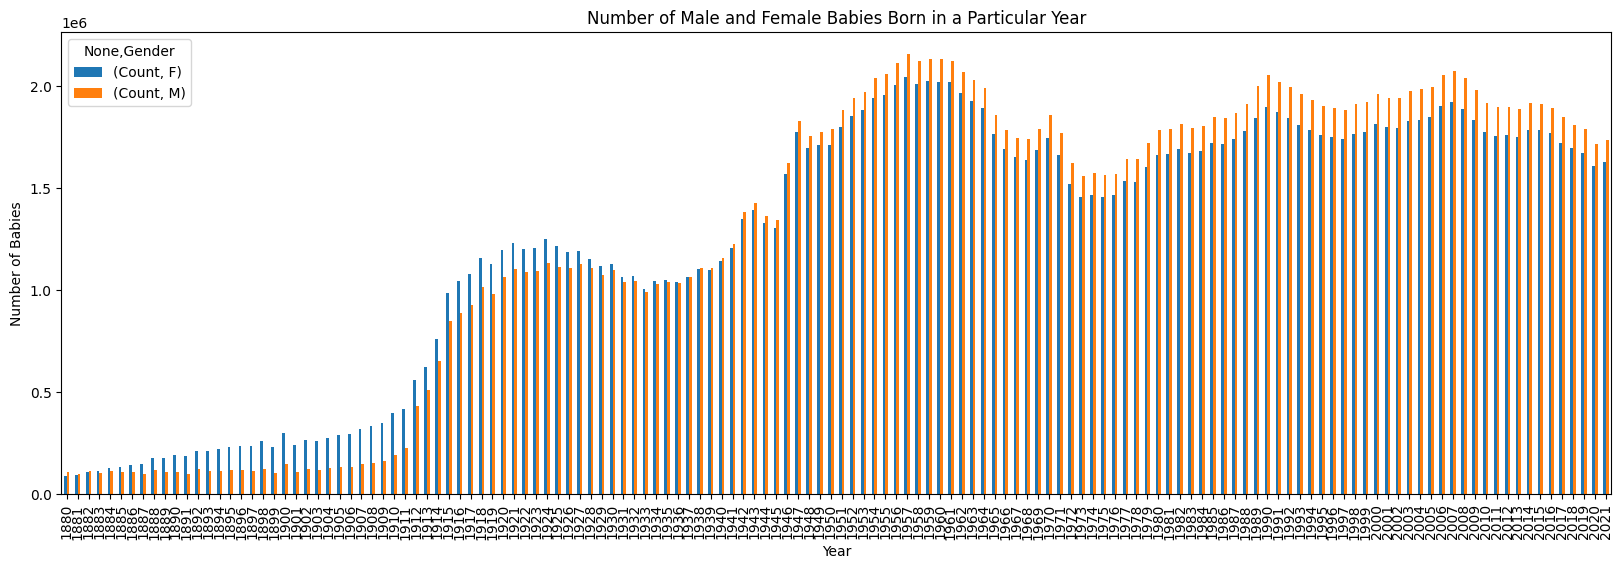

In [12]:
# visualize the number of male and female babies born in a particular year
gender_year = df.groupby(['Year', 'Gender']).sum().unstack()
gender_year.plot(kind='bar', figsize=(20,6))
plt.title('Number of Male and Female Babies Born in a Particular Year')
plt.xlabel('Year')
plt.ylabel('Number of Babies')
plt.show()

In [13]:
# analyze baby names by sorting out all birth counts
name_counts = df.groupby('Name').sum()
name_counts = name_counts.sort_values(by='Count', ascending=False)

<ipython-input-13-98da804799a9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  name_counts = df.groupby('Name').sum()


In [14]:
# analyze baby names by sorting out top 100 birth counts
top_names = name_counts.nlargest(100, 'Count')
top_names = top_names.groupby('Name').sum().sort_values(by='Count', ascending=False)

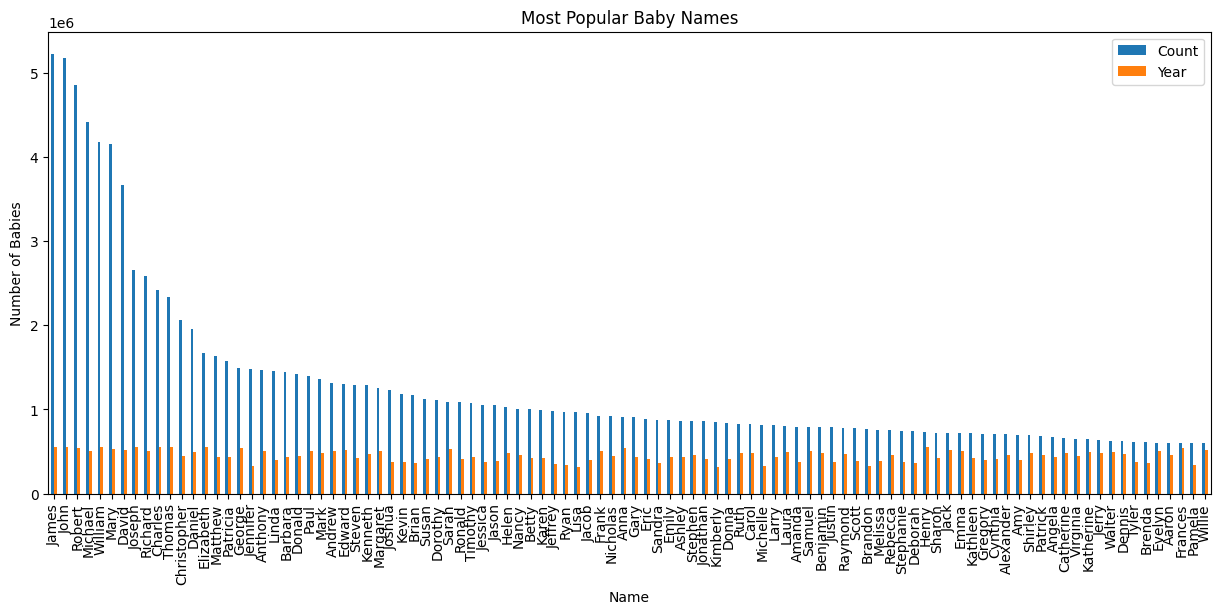

In [17]:
# plot the most popular baby names
top_names.plot(kind='bar', figsize=(15,6))
plt.title('Most Popular Baby Names')
plt.xlabel('Name')
plt.ylabel('Number of Babies')
plt.show()

In [16]:
# close the zipped file
z.close()

Based on the analysis of the dataset of popular baby names provided by the Social Security Administration of the United States, we can draw the following conclusions:

There are 142 useful files in the dataset, which will be used for further analysis.
From the analysis of the dataset, it was observed that from 1883 to 1936 the number of female babies born was higher than the number of male babies. However, from 1938 to 2021, the number of male babies born was higher than the number of female babies.
The most popular baby name in the dataset was James, followed by John and Robert.
These observations provide some insights into the changing trends of baby names and gender distribution over time in the United States.